In [2]:
!pip install numpy pandas scikit-learn matplotlib

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris

4150.6801893299835 0.19057346847560142
Mean Squared Error: 4150.6801893299835
R^2 Score: 0.19057346847560142


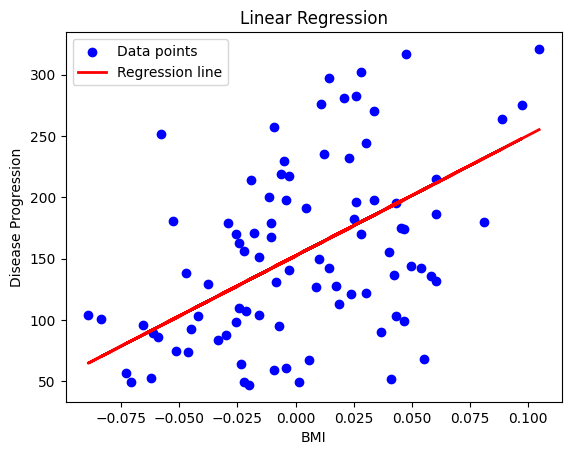

In [33]:
diabetes = load_diabetes() # here it retusl dataset as a name tuple with two attreibutes : data and target
#scikit-learn tries to make a clear distinction between the input features 9X) and the target variable (y) in their datasets.

X = diabetes.data
y = diabetes.target
# to do that with our own database we usually use like this
'''
X = my_dataset.iloc[:, :-1]  # All columns except the last one
y = my_dataset.iloc[:, -1]   # The last column
'''

diabetes_df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)
# print(diabetes_df.columns) # display column, label X and Y
X_df = pd.DataFrame(X, columns=diabetes.feature_names)
y_df = pd.DataFrame(y, columns=['Progession'])

X = X_df[['bmi']].values  #why the heck replace in the same variables
y = y_df.values

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Create a linear regression model
model = LinearRegression()

#train the model
model.fit(X_train,y_train)

#Predict the test set results
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse,r2)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Regression')
plt.legend()
plt.show()



In [29]:
# Evan after PCA, removing null valus , and do MinMax Scaler the task is still the same
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Load the diabetes dataset
diabetes = load_diabetes()

# Create the feature and target DataFrames
X_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_df = pd.DataFrame(diabetes.target, columns=['Progression'])

# 1. Remove null values
X_df = X_df.dropna()
y_df = y_df.dropna()

# 2. Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_df)
X_df_scaled = pd.DataFrame(X_scaled, columns=X_df.columns)

# 3. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_df_scaled)
X_df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Combine the scaled and PCA-transformed features with the target variable
df_final = pd.concat([X_df_scaled, X_df_pca, y_df], axis=1)

# You can now use the `df_final` DataFrame for your further analysis
print(df_final.head())


#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Create a linear regression model
model = LinearRegression()

#train the model
model.fit(X_train,y_train)

#Predict the test set results
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse,r2)

        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         s5        s6  ...       PC2       PC3       PC4       PC5       PC6  \
0  0.562217  0.439394  ... -0.073173  0.109927  0.258145 -0.110521 -0.148724   
1  0.222437  0.166667  ... -0.279555  0.133220 -0.195131  0.001810 -0.183816   
2  0.496578  0.409091  ... -0.107792  0.260695  0.139987 -0.285304 -0.154633   
3  0.572923  0.469697  ...  0.107140 -0.483260 -0.014050  0.027291  0.050508   
4  0.362385  0.333333  ...  0.046793  0.060068 -0.075607 -0.008881 -0.150724   

        PC7       PC8       PC9      P

# SINGLE LINEAR REGRESSION

Given a dataset of house sizes and prices, predict the price of a house based on its size.

House Size (sq ft) Price ($)

1500 300000

1600 320000

1700 340000

1800 360000

1900 380000

We will use simple linear regression to predict the price of a house with 2000 sq ft.



In [38]:
import numpy as np

# The formula you provided is for calculating the beta_1 coefficient in linear regression. It is used to estimate the slope of the line that best fits the data points.


# Dataset
X = np.array([1500, 1600, 1700, 1800, 1900])
y = np.array([300000, 320000, 340000, 360000, 380000])


n = len(X)
beta_1 = (n * np.sum(X*y) - np.sum(X) * np.sum(y)) / (n * np.sum(X**2) - np.sum(X)**2)
beta_0 = (np.sum(y) - beta_1 * np.sum(X)) / n


# Predict the price for a house with 2000 sq ft
house_size = 2000
predicted_price = beta_0 + beta_1 * house_size

print(f"Slope (beta_1): {beta_1}")
print(f"Intercept (beta_0): {beta_0}")
print(f"Predicted price for a house with {house_size} sq ft: ${predicted_price}")



Slope (beta_1): 200.0
Intercept (beta_0): 0.0
Predicted price for a house with 2000 sq ft: $400000.0


# MULTIPLE LINEAR REGRESSION



Mean Squared Error: 3424.259334298692
R^2 Score: 0.3322332173106184


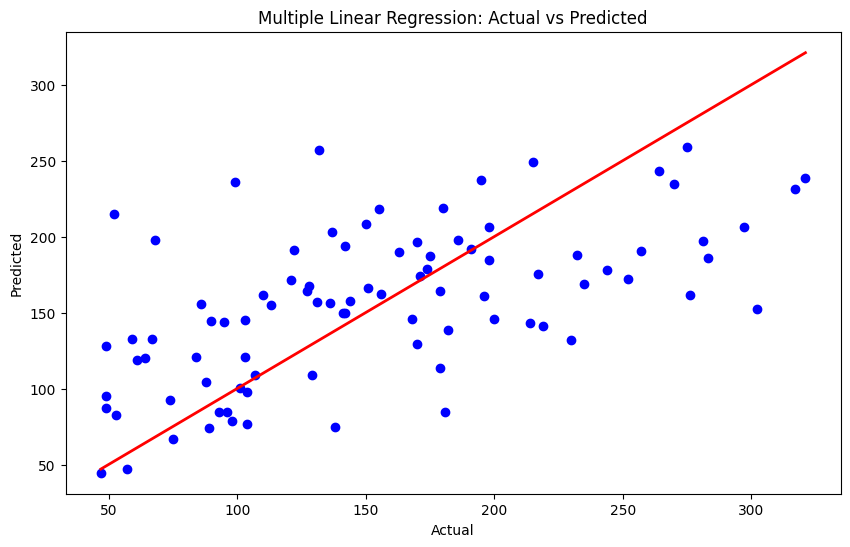

In [39]:
# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to pandas DataFrame for easier manipulation
X_df = pd.DataFrame(X, columns=diabetes.feature_names)
y_df = pd.DataFrame(y, columns=['Progression'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=0)

# Create a Multiple Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results (actual vs predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()


In [40]:
'''
Given a dataset of house sizes, number of bedrooms, and prices, predict the price of a house based on its size and number of bedrooms.

House Size (sq ft)	Number of Bedrooms	Price ($)
1500	3	300000

1600	3	320000

1700	3	340000

1800	4	360000

1900	4	380000

We will use multiple linear regression to predict the price of a house with 2000 sq ft and 4 bedrooms.
'''

import numpy as np

# Dataset
X = np.array([[1500, 3], [1600, 3], [1700, 3], [1800, 4], [1900, 4]])
y = np.array([300000, 320000, 340000, 360000, 380000])

# Add a column of ones to X for the intercept
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculate the coefficients using the Normal Equation
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predict the price for a house with 2000 sq ft and 4 bedrooms
house_features = np.array([1, 2000, 4])
predicted_price = house_features @ beta

print(f"Coefficients (beta): {beta}")
print(f"Predicted price for a house with 2000 sq ft and 4 bedrooms: ${predicted_price}")


Coefficients (beta): [ 1.54412874e-08  2.00000000e+02 -1.94529548e-09]
Predicted price for a house with 2000 sq ft and 4 bedrooms: $400000.0000000015
